# 1. Importing libraries
---

In [91]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from   sklearn.preprocessing import LabelEncoder
from   sklearn.tree import DecisionTreeRegressor
from   sklearn.preprocessing import PolynomialFeatures
from   sklearn.metrics import accuracy_score
from   sklearn.model_selection import train_test_split

# 2. Loading data
---

In [92]:
df = pd.read_csv("/Users/vitoriawillanidealmeida/Desktop/DATA SCIENCE/Projetos próprios/Salary Pred/Salary_Data.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


# 3. Defining questions to explore:
---

* Is there a high difference in salary between genders?
* What is the average salary for a given education level?
* What is the average salary for a given year of experience?
* What is the average salary for every job title?


### Data Information

 We have 6704 observations and 6 features

In [93]:
df.shape

(6704, 6)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


**Data Summarization before pre processing**

In [95]:
df.describe().T.style


,count,mean,std,min,25%,50%,75%,max
Age,6702.000000,33.620859,7.614633,21.000000,28.000000,32.000000,38.000000,62.000000
Years of Experience,6701.000000,8.094687,6.059003,0.000000,3.000000,7.000000,12.000000,34.000000
Salary,6699.000000,115326.964771,52786.183911,350.000000,70000.000000,115000.000000,160000.000000,250000.000000


### Almost every observation in non-null, so we will impute the missing values using the median for numerical observations and the most frequent class for categorical observations.

### One key point to note: in order to prevent data leakage, it is essential to slice data on a train and test it before performing any data processing. In a dataset containing 6704 observations, the column with the most imputations received 5 values. As a result of this, we don't use best practices in this particular case.

In [96]:

numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

categorical_cols = df.select_dtypes(exclude=[np.number]).columns
for col in categorical_cols:
    most_frequent = df[col].mode()[0]
    df[col] = df[col].fillna(most_frequent)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6704 non-null   float64
 1   Gender               6704 non-null   object 
 2   Education Level      6704 non-null   object 
 3   Job Title            6704 non-null   object 
 4   Years of Experience  6704 non-null   float64
 5   Salary               6704 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


# 4. Visualization

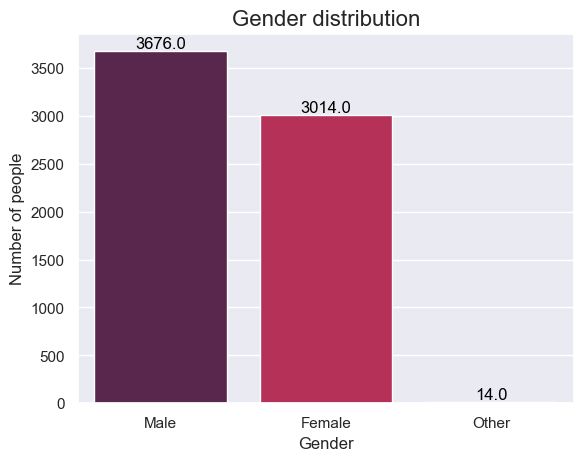

In [98]:
sns.set(style = "darkgrid")
ax =sns.countplot(data = df, x = "Gender", palette = "rocket")
plt.xlabel("Gender")
plt.ylabel("Number of people")
plt.title("Gender distribution", fontsize = 16)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

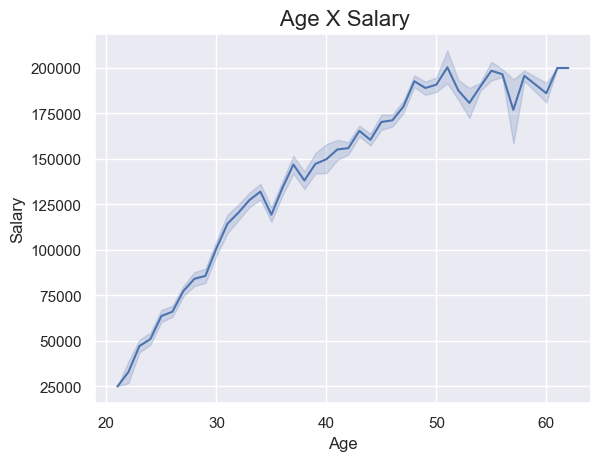

In [99]:

sns.lineplot(data = df, x = "Age", y = "Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title(" Age X Salary", fontsize = 16)
plt.show()


## Age and salary are positively correlated

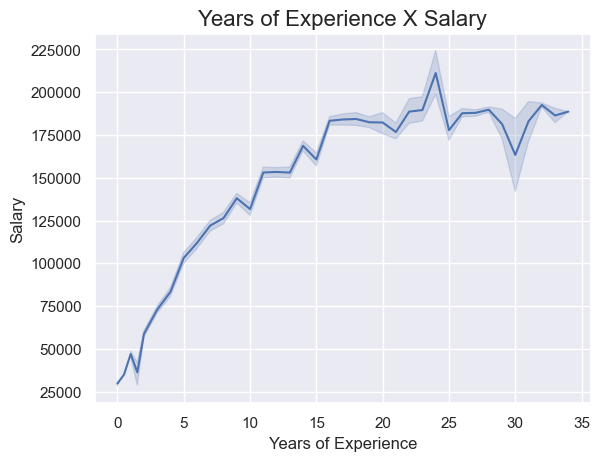

In [100]:
sns.lineplot(data = df, x = "Years of Experience", y = "Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Years of Experience X Salary", fontsize = 16)
plt.show()

## Years of experience and salary are positively correlated

Text(0.5, 1.0, 'Salary distribution by gender')

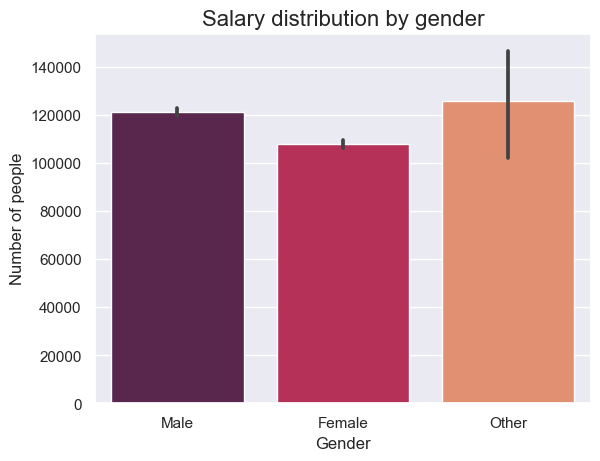

In [101]:
ax =sns.barplot(data = df, x = "Gender", y = "Salary", palette = "rocket")
plt.xlabel("Gender")
plt.ylabel("Number of people")
plt.title("Salary distribution by gender", fontsize = 16)

## The difference between males and females salaries apparently isn't significant

In [102]:
df["Education Level"].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

Some categories must be brought together

In [103]:
df['Education Level'] = df['Education Level'].replace({
    "Bachelor's Degree": "Bachelor's",
    "Master's Degree": "Master's",
    "phD": "PhD"
})

In [104]:
salaries_for_education = df.groupby("Education Level")["Salary"].mean().reset_index()
salaries_for_education


,Education Level,Salary
0,Bachelor's,95110.861533
1,High School,36706.694196
2,Master's,130103.936056
3,PhD,165651.457999


Putting the educational level in proper sequence.

In [105]:
salaries_for_education = salaries_for_education.reindex([1,0,2,3])

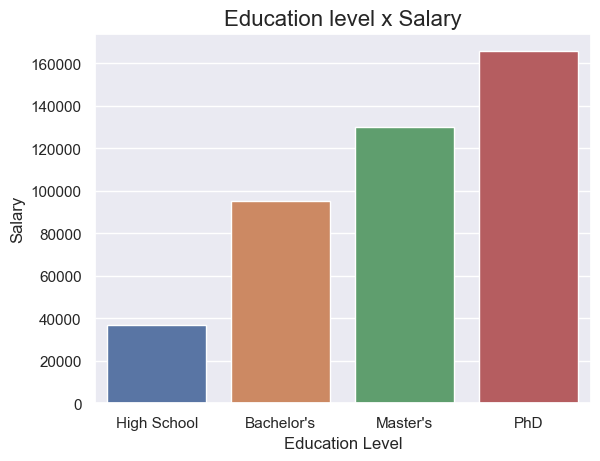

In [106]:
ax = sns.barplot(data = salaries_for_education, x = "Education Level", y = "Salary")
plt.title("Education level x Salary", fontsize = 16)
plt.show()

In [108]:
salaries_for_Title = df.groupby("Job Title")["Salary"].mean().reset_index().sort_values(by="Salary", ascending=False)

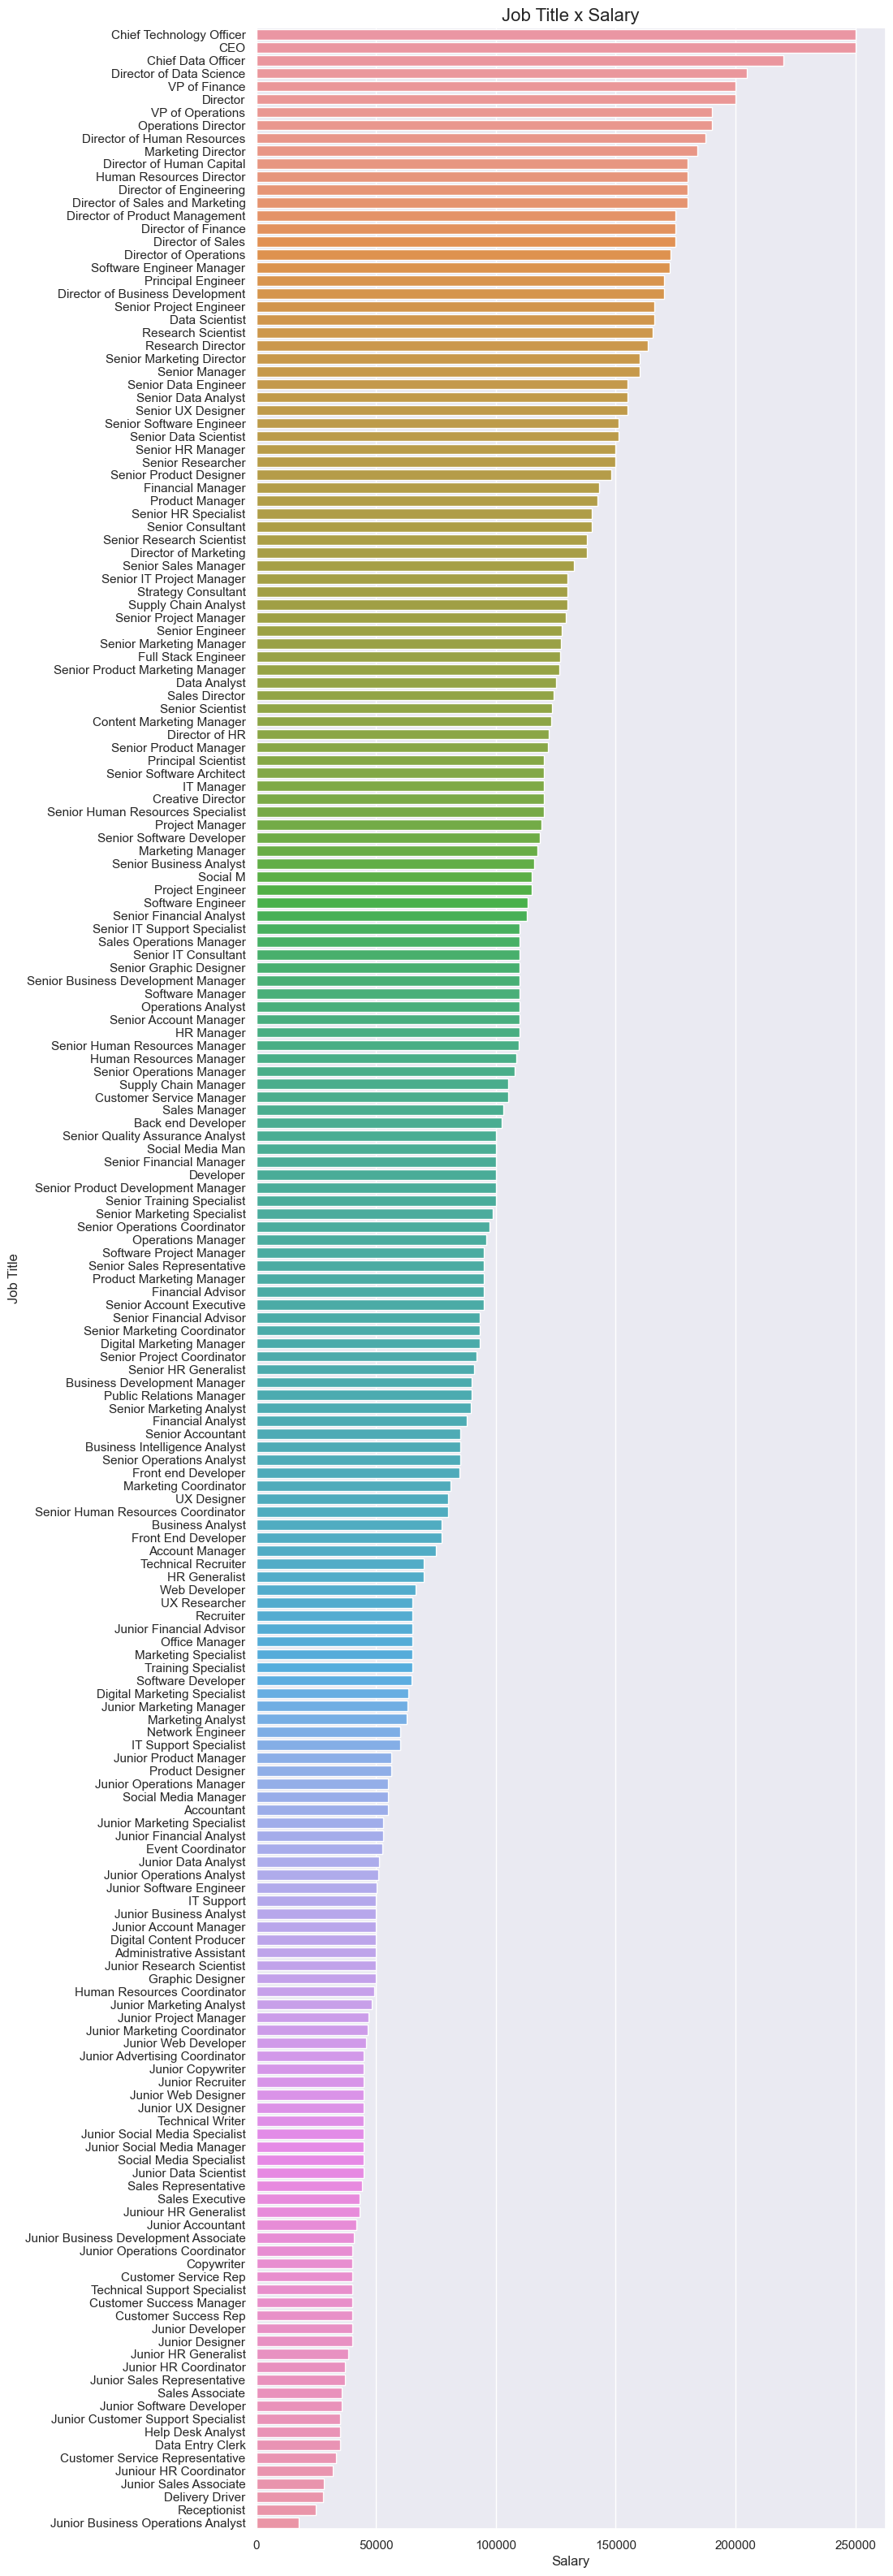

In [109]:
plt.figure(figsize=(10, 40))

ax = sns.barplot(data=salaries_for_Title, y="Job Title", x="Salary", orient="h")
plt.title("Job Title x Salary", fontsize=16)
plt.xlabel("Salary")
plt.ylabel("Job Title")
plt.show()

In [ ]:

df['Years of Experience'] = df['Years of Experience'].apply(np.floor).astype(int)

bins = range(0, df['Years of Experience'].max() + 6, 5) 

salaries_for_years = df.groupby(pd.cut(df['Years of Experience'], bins=bins, right=False))['Salary'].mean().reset_index()
salaries_for_years

,Years of Experience,Salary
0,"[0, 5)",63409.500623
1,"[5, 10)",120006.609000
2,"[10, 15)",153000.251577
3,"[15, 20)",179408.146409
4,"[20, 25)",186583.742718
5,"[25, 30)",183744.200000
6,"[30, 35)",183320.310345


## We can see that highest salaries are paid for professionals with years of experience between twenty and twenty-five.

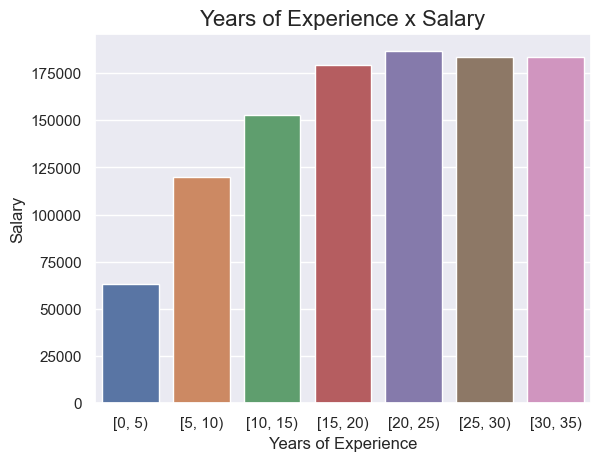

In [ ]:
ax = sns.barplot(data = salaries_for_years, x = "Years of Experience", y = "Salary")
plt.title("Years of Experience x Salary", fontsize = 16)
plt.show()

In [ ]:
df["Job Title"].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

There are 193 different job titles

In [ ]:
len(df["Job Title"].unique())

193

# 5. Data PreProcessing

**Null Values**:

In [ ]:
df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

### When dealing with ordinal categorical variables,(`Education Level`) that is, those that have a meaningful order among their categories, the usage of Label Encoder is suitable. It assigns a unique number to each category while maintaining the order, which is important for algorithms that rely on this information, such as decision trees. 

### The One-Hot Encoder, on the other hand, is better suited for nominal categorical variables (`Job Title` , `Gender`)with no natural order among the categories. It generates a binary matrix in which each column represents a different category, making interpretation easier for algorithms that require category independence.

In [ ]:
label_encoder = LabelEncoder()
df['Education Level'] = label_encoder.fit_transform(df['Education Level'])

# Aplicando OneHotEncoder em 'Job Title' e 'Gender'
df = pd.get_dummies(df, columns=['Job Title', 'Gender'])

# Resultado
df.head()

,Age,Education Level,Years of Experience,Salary,Job Title_Account Manager,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Back end Developer,Job Title_Business Analyst,Job Title_Business Development Manager,...,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer,Gender_Female,Gender_Male,Gender_Other
0,32.0,0,5,90000.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,28.0,2,3,65000.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,45.0,3,15,150000.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,36.0,0,7,60000.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,52.0,2,20,200000.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


# 6. Models - Predicting salaries

**separating data on train and test**

In [ ]:
X = df.drop("Salary", axis= 1)
y = df["Salary"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 314)

## 6.1 **Neural MultiLayer Perceptron(ReLu)**

In [ ]:
from sklearn.neural_network import MLPRegressor
neural = MLPRegressor(random_state=314, max_iter=1000).fit(X_train, y_train)
y_pred = neural.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
Neural_Accuracy=neural.score(X_test, y_test)*100
print(f'The Accuracy of the Model is {Neural_Accuracy}')

The Accuracy of the Model is 76.46804866048674


## 6.2 **Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=314,learning_rate=0.2,n_estimators=200)
model.fit(X_train, y_train)
pred_y = model.predict(X_test)

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=314, shuffle = True)

In [ ]:
gradient_accuracy = (model.score(X_test,y_test)*100)
print(f'The Accuracy of the Model is {gradient_accuracy}')

The Accuracy of the Model is 94.19176000883766


## 6.3 **Decision Tree Regressor**

In [ ]:
model=DecisionTreeRegressor(max_depth=9)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:

Decision_tree_Accuracy = model.score(X_test,y_test)*100
print(f'The Accuracy of the Model is {Decision_tree_Accuracy}')

The Accuracy of the Model is 93.38943849071224


## 6.4 **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor  
regressor = KNeighborsRegressor(n_neighbors=3)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
accuracy = regressor.score(X_test,y_test)*100
print(f'The Accuracy of the Model for k = {3} is {accuracy}')

The Accuracy of the Model for k = 3 is 95.84548431898962


## 6.5 **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random = RandomForestRegressor(max_depth=9, random_state=314)
random.fit(X_train, y_train)
y_pred = random.predict(X_test)

In [ ]:
Random_Forest_Accuracy=random.score(X_test, y_test)*100
print(f'The Accuracy of the Model is {Random_Forest_Accuracy}')

The Accuracy of the Model is 94.97013681564262


## The best model was KNN, with 95.85% accuracy in salary prediction.